# TD4 Advanced Regressions

#### Following this beautiful publication on Kaggle competition : 
https://www.kaggle.com/shaygu/house-prices-begginer-top-7/notebook

In [71]:
import github_command as gt

In [154]:
gt.push(file_to_transfer="TD4_Advanced_Regressions.ipynb", 
        message="missing data", 
        repos="TDs_ESILV")

In [48]:
gt.push(file_to_transfer="TD4_data.ipynb", 
        message="img1 skewness upload", 
        repos="TDs_ESILV")

# Table of contents
1. [Importing libraries](#libraries)
2. [Loading and querying data](#data loading)

## Libraries <a name='libraries'/>

In [73]:
import warnings
warnings.filterwarnings('ignore') # ignore warnings messages in iPython

import os # os functions for files/directory manipulation
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # data viz
import seaborn as sns # data viz
import numpy as np # vecotrized function + data manipulation
from scipy.stats import norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax # for skewness
from sklearn.preprocessing import StandardScaler
from scipy import stats
from IPython.display import display, Image
%matplotlib inline

In [74]:
pd.set_option('display.float_format', 
              lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [75]:
if not os.path.exists("TD4_data/"):
    os.mkdir("TD4_data/")

In [76]:
os.listdir("TD4_data")

['.DS_Store',
 'test.csv',
 'img1_skewness.png',
 'train.csv',
 'sample_submission.csv']

## Data Loading and Querying <a name="data loading" />

In [77]:
# Read files
train = pd.read_csv("./TD4_data/train.csv")
test  = pd.read_csv("./TD4_data/test.csv")

In [78]:
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

In [79]:
#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id",  axis = 1, inplace = True)

In [80]:
plt.rcParams["figure.figsize"] = 20,15

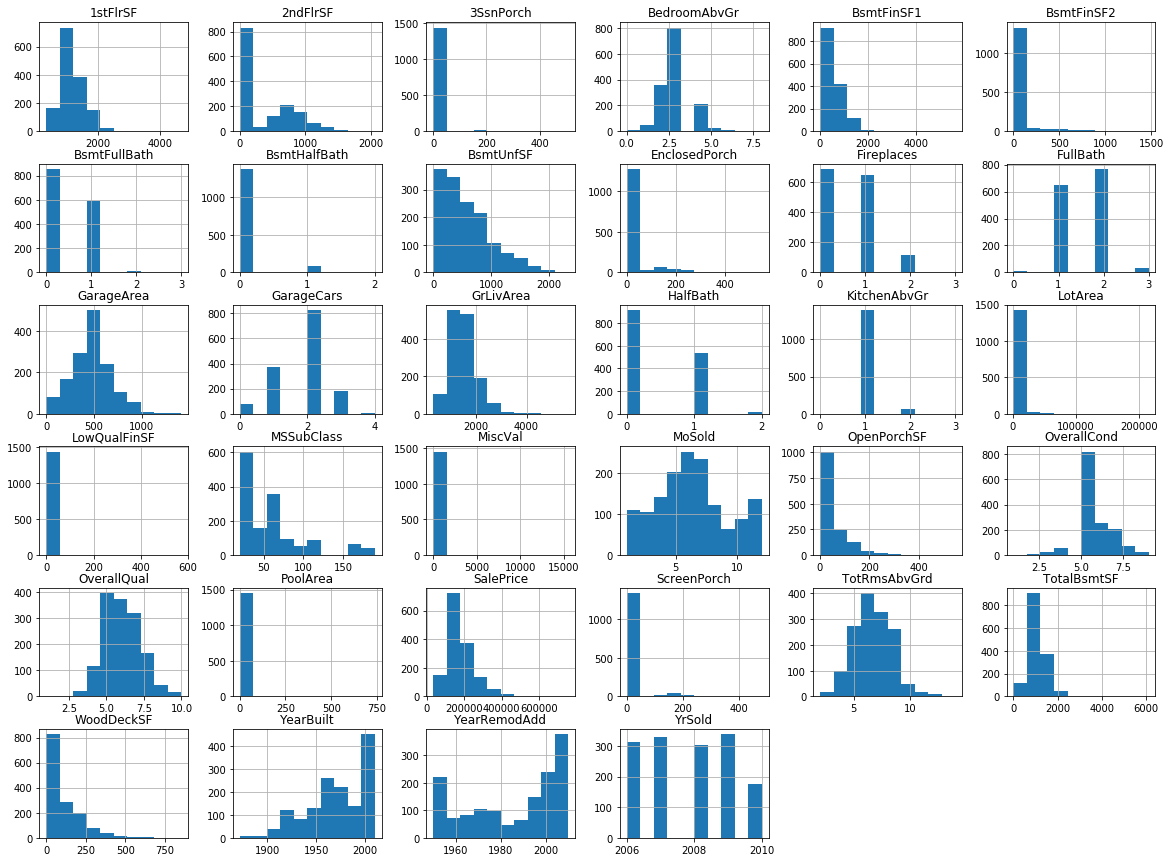

In [81]:
_fig = train[numerical_columns].hist()

In [82]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,1460.000,...,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,46.549,...,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,161.319,...,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,0.000,...,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,0.000,...,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,1474.000,...,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


In [83]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [84]:
train.shape, test.shape

((1460, 80), (1459, 79))

#### colonne d'intérêt <=> dependent variable

In [85]:
set(train.columns) ^ set(test.columns)

{'SalePrice'}

## Outlier detection

Énumérer les outliers comme deviant de ***N*** standard deviation vis-à-vis de la moyenne.

Est-ce que cela fait sens ? 

In [86]:
numerical_columns = train.dtypes[train.dtypes=='int64'].index

In [87]:
def find_outlier(col, number_stds):
    try:
        return [ val for val in col if np.abs(val) > number_stds * np.std(col) ]
    except:
        return 'error'

In [88]:
def indices_outlier(col):
    return list(col[col].index.values)

In [89]:
train[numerical_columns].apply(find_outlier, number_stds=7).to_frame()

,0
MSSubClass,[]
LotArea,"[159000, 215245, 164660, 70761, 115149]"
OverallQual,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1..."
OverallCond,"[8, 8, 8, 8, 8, 8, 8, 9, 8, 9, 9, 9, 8, 8, 8, ..."
YearBuilt,"[2003, 1976, 2001, 1915, 2000, 1993, 2004, 197..."
YearRemodAdd,"[2003, 1976, 2002, 1970, 2000, 1995, 2005, 197..."
BsmtFinSF1,[5644]
BsmtFinSF2,[1474]
BsmtUnfSF,[]
TotalBsmtSF,"[3206, 3094, 3200, 3138, 6110]"


## Data skewness & kurtosis

* assymétrie <=> skewness
* a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean
* third standardized moment

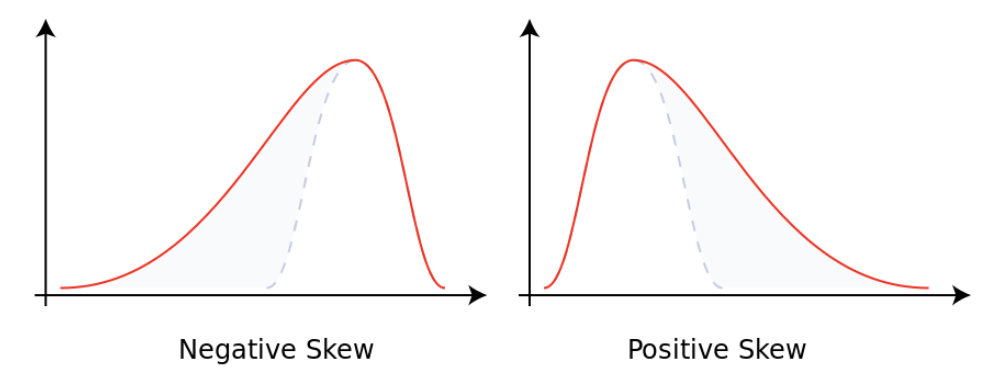

In [90]:
Image(filename="TD4_data/img1_skewness.png")

                <=> left skewed  ---------- <=> right skewed

* allongement de la distribution <=> Kurtosis
* measure of the "tailedness" of the probability distribution of a real-valued random variable
* fourth standardized moment

Skewness: 1.882876
Kurtosis: 6.536282


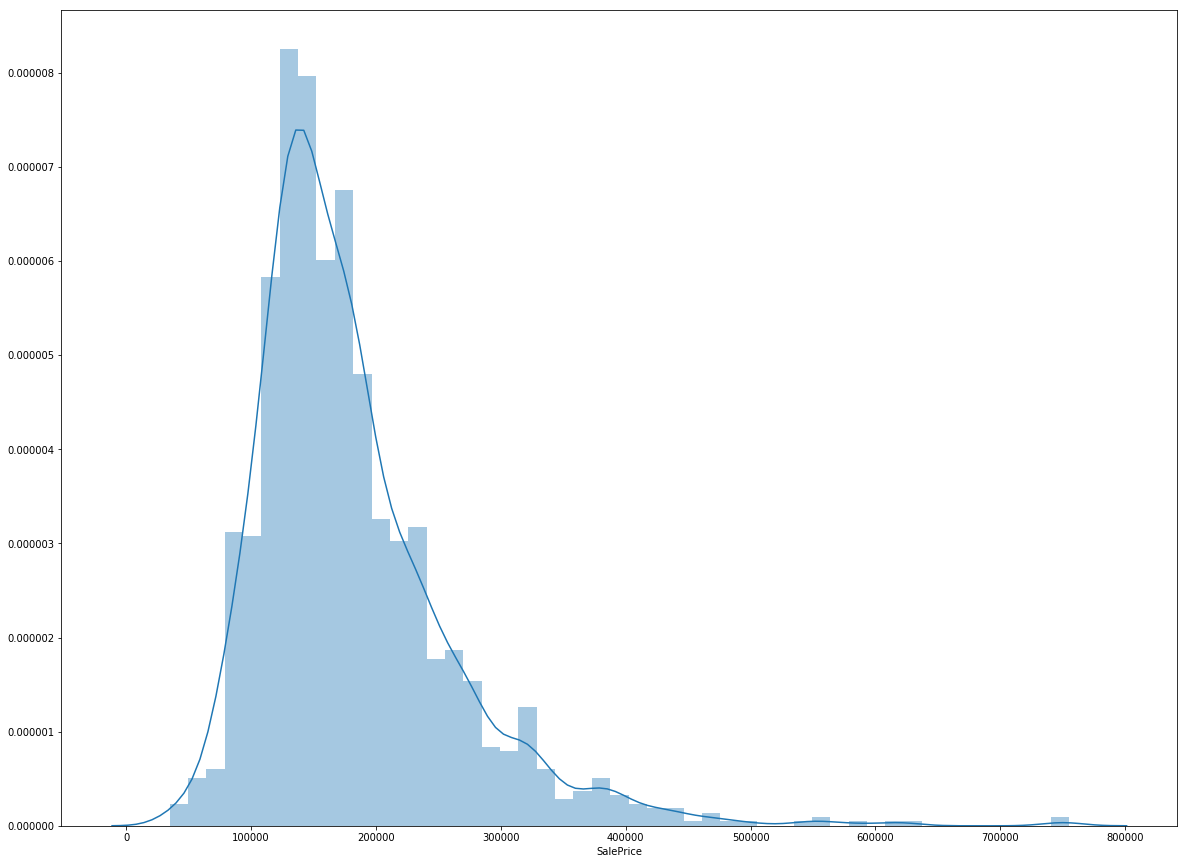

In [91]:
train['SalePrice'].describe()
sns.distplot(train['SalePrice'])
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Text(0.5,0.98,'After transformation')

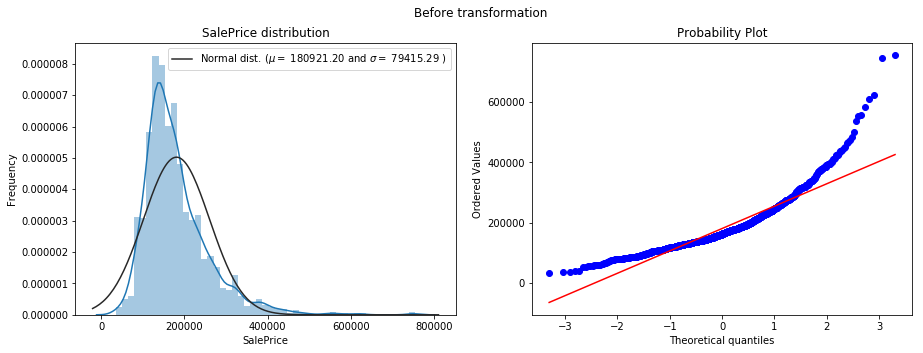

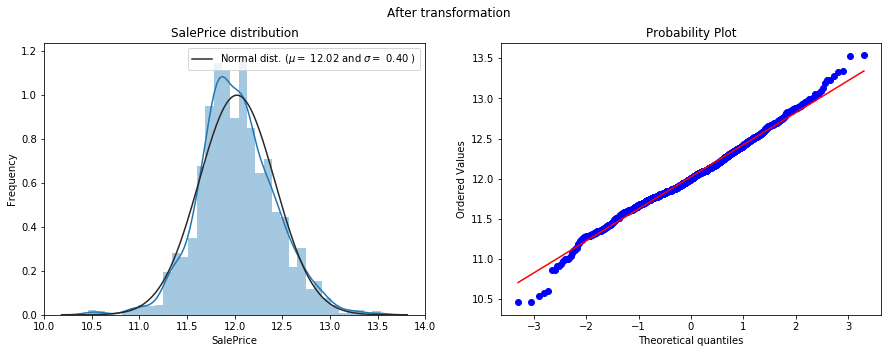

In [92]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

# Plot histogram and probability
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(train['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc=1)
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.subplot(1,2,2)
res = stats.probplot(train['SalePrice'], plot=plt)
plt.suptitle('Before transformation')

# Apply transformation
train.SalePrice = np.log1p(train.SalePrice)

# Plot histogram and probability after transformation
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(train['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc=1)
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.subplot(1,2,2)
res = stats.probplot(train['SalePrice'], plot=plt)
plt.suptitle('After transformation')

In [93]:
# New prediction
y_train = train.SalePrice.values
y_train_orig = train.SalePrice

In [96]:
test.shape

(1459, 79)

## Data Features and imputation

#### Concatenate train and test

In [100]:
data_features = pd.concat([train, test]).reset_index(drop=True)
print(data_features.shape)

(2919, 80)


#### Missing data

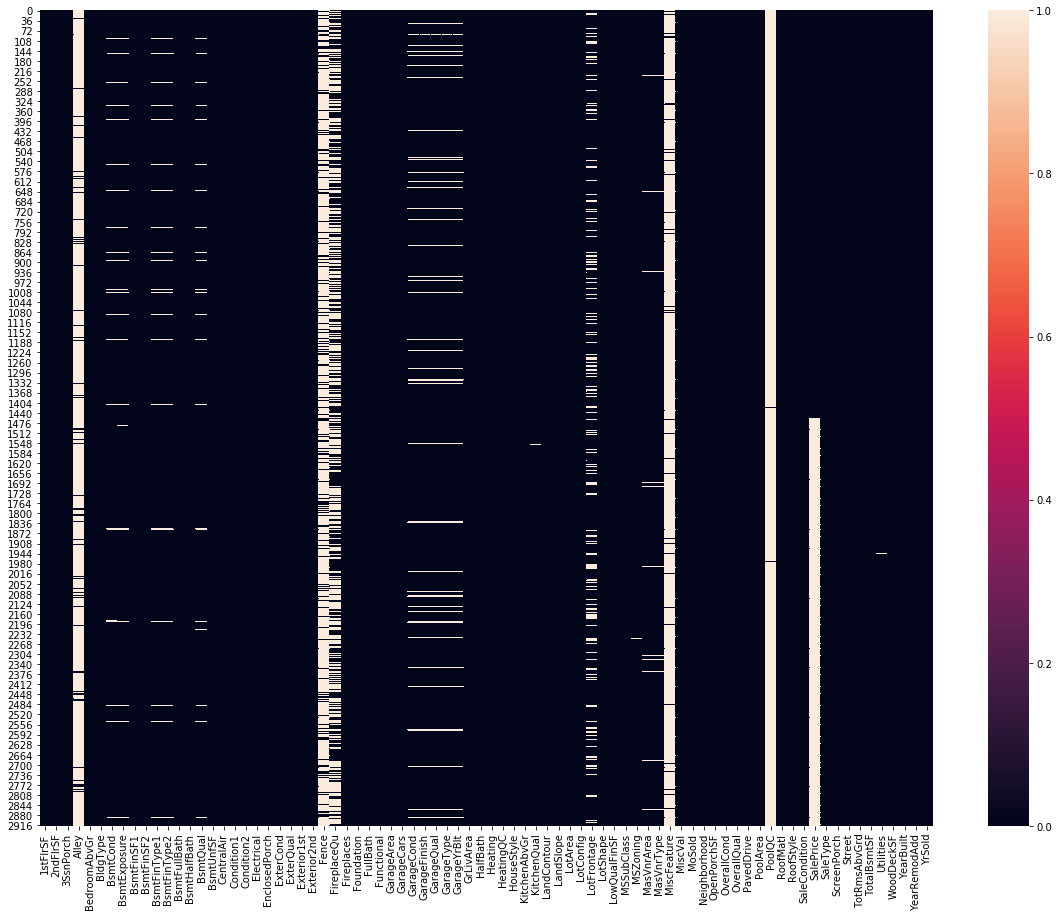

In [102]:
sns.heatmap(data_features.isna())

In [170]:
def details_na_values(df):
    s = (df.isnull().sum()/df.shape[0]).sort_values(ascending=False)
    Missing_data = pd.concat([s[s>0], df.isnull().sum(), df.dtypes], join='inner', ignore_index=False, axis=1)
    return Missing_data

In [171]:
details_na_values(data_features)

,0,1,2
PoolQC,0.997,2909,object
MiscFeature,0.964,2814,object
Alley,0.932,2721,object
Fence,0.804,2348,object
SalePrice,0.500,1459,float64
FireplaceQu,0.486,1420,object
LotFrontage,0.166,486,float64
GarageQual,0.054,159,object
GarageYrBlt,0.054,159,float64
GarageFinish,0.054,159,object


#### Pour les colonnes ayant très peu de données manquante étant 

In [178]:
common_vars = ['MSZoning', 'Exterior1st','Exterior2nd','SaleType','Electrical','KitchenQual']
for var in common_vars:
    data_features[var] = data_features[var].fillna(data_features[var].mode()[0])

In [179]:
details_na_values(data_features)

,0,1,2
PoolQC,0.997,2909,object
MiscFeature,0.964,2814,object
Alley,0.932,2721,object
Fence,0.804,2348,object
SalePrice,0.500,1459,float64
FireplaceQu,0.486,1420,object
LotFrontage,0.166,486,float64
GarageQual,0.054,159,object
GarageYrBlt,0.054,159,float64
GarageCond,0.054,159,object


In [ ]:
# # data description says NA means "No Pool", majority of houses have no Pool at all in general.
# features[] = features["PoolQC"].fillna("None")
# Replacing missing data with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual',
            'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',"PoolQC"
           ,'Alley','Fence','MiscFeature','FireplaceQu','MasVnrType','Utilities']:
    data_features[col] = data_features[col].fillna('None')
# # For all these categorical basement-related features, NaN means that there is no basement

0            RL
1            RL
2            RL
3            RL
4            RL
5            RL
6            RL
7            RL
8            RM
9            RL
10           RL
11           RL
12           RL
13           RL
14           RL
15           RM
16           RL
17           RL
18           RL
19           RL
20           RL
21           RM
22           RL
23           RM
24           RL
25           RL
26           RL
27           RL
28           RL
29           RM
         ...   
2889         RM
2890         RM
2891    C (all)
2892    C (all)
2893    C (all)
2894         RM
2895         RM
2896         RL
2897         RL
2898         RL
2899         RL
2900         RL
2901         RL
2902         RL
2903         RL
2904         RL
2905         RM
2906         RM
2907         RL
2908         RL
2909         RM
2910         RM
2911         RL
2912         RM
2913         RM
2914         RM
2915         RM
2916         RL
2917         RL
2918         RL
Name: MSZoning, Length: 

In [126]:
pd.DataFrame([[2,False,4], [2,True,5]]).count()

0    2
1    2
2    2
dtype: int64

In [127]:
pd.DataFrame([[2,3,4], [2,3,5]])

,0,1,2
0,2,3,4
1,2,3,5
